This notebook visualize the results of the methods evaluated with Benchmark

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os, sys
import numpy as np

In [3]:
result_dir = 'Benchmark_results/'
all_result_file = os.listdir(result_dir)
all_result_file.sort()

In [4]:
all_res_df = []
methods = []
# load all results into pandas dataframe
for file in all_result_file:
    if file.endswith('result.txt'):
        methods.append(file.replace('_result.txt', ''))
        res_df = pd.read_csv(result_dir+file, sep='\t', header=None, index_col=0)
        all_res_df.append(res_df)

In [5]:
# combine the results
all_result_df = pd.concat(all_res_df, axis=1)
all_result_df.columns = methods
all_result_df

,EGSEA,Enrichr,GSEA,Ora,PET,PIANO,camera,decoupler,enrichment_browser,gage,gsva,ora_egsea,padog,plage,safe,ssgsea,zscore
0,,,,,,,,,,,,,,,,,
AARS,11.0,1,2,1,1,1.0,2.0,1.0,3,44.0,13.0,3.0,87.0,128.0,30.0,7.0,8.0
AATF,1.0,4,6,6,3,4.0,18.0,2.0,1,72.0,71.0,25.0,83.0,2.0,10.0,1.0,14.0
ABCF1,5.0,15,16,15,10,10.0,2.0,13.0,1,54.0,1.0,25.0,1.0,113.0,1.0,5.0,1.0
ADAR,1.0,1,1,1,1,1.0,1.0,1.0,2,2.0,1.0,1.0,1.0,18.0,89.0,1.0,1.0
AGO1,24.0,4,1,4,1,6.0,18.0,2.0,11,15.0,45.0,37.0,141.0,33.0,129.0,5.0,13.0
AKAP1,2.0,50,36,44,40,11.0,9.0,2.0,1,20.0,16.0,3.0,1.0,100.0,2.0,5.0,7.0
AKAP8,3.0,17,13,12,6,13.0,5.0,5.0,25,51.0,2.0,49.0,19.0,44.0,5.0,9.0,2.0
AKAP8L,2.0,1,1,1,1,2.0,1.0,1.0,9,45.0,1.0,2.0,1.0,161.0,1.0,1.0,1.0
APOBEC3C,10.0,18,64,22,22,20.0,7.0,24.0,7,11.0,2.0,193.0,29.0,47.0,33.0,1.0,2.0


<AxesSubplot: ylabel='Ground truth pathway rank'>

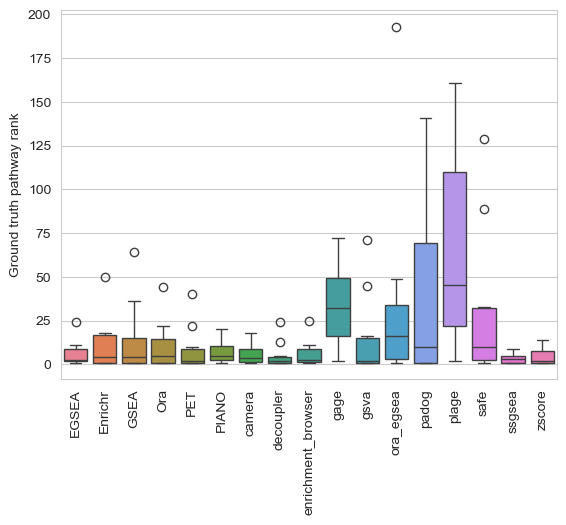

In [6]:
# plot the results
plt.xticks(rotation=90)
plt.ylabel('Ground truth pathway rank')
sns.boxplot(data=all_result_df)

In [8]:
 def apk(predicted, k=10):
    """
    Computes the average precision at k.
    This function computes the average precision at k between two lists of items.
    """
    total_num = len(predicted)
    precision_list = []
    for idx in range(k):
        precision_list.append(np.where(predicted<=idx+1)[0].shape[0]/total_num)
        # print(np.where(predicted<=idx+1)[0].shape[0])
    # return P@10 and AP@10
    return precision_list[-1], np.mean(precision_list)

<AxesSubplot: ylabel='Percent'>

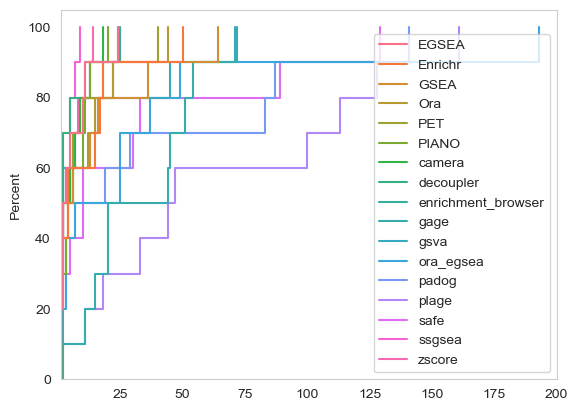

In [9]:
plt.grid(False)
plt.xlim(1, 200)
# plt.ylim(0, 100)
sns.ecdfplot(data=all_result_df, stat='percent')

In [10]:
for method in all_result_df.columns:
    print('-'*20)
    print(method, 'summary:')
    print('Median rank: ', all_result_df[method].median())
    print('Precision@10: ', apk(all_result_df[method])[0])
    print('Average Precision@10: ', apk(all_result_df[method])[1])

--------------------
EGSEA summary:
Median rank:  2.5
Precision@10:  0.8
Average Precision@10:  0.6199999999999999
--------------------
Enrichr summary:
Median rank:  4.0
Precision@10:  0.6
Average Precision@10:  0.5399999999999999
--------------------
GSEA summary:
Median rank:  4.0
Precision@10:  0.6
Average Precision@10:  0.5399999999999998
--------------------
Ora summary:
Median rank:  5.0
Precision@10:  0.6
Average Precision@10:  0.5199999999999999
--------------------
PET summary:
Median rank:  2.0
Precision@10:  0.8
Average Precision@10:  0.64
--------------------
PIANO summary:
Median rank:  5.0
Precision@10:  0.7
Average Precision@10:  0.5
--------------------
camera summary:
Median rank:  3.5
Precision@10:  0.8
Average Precision@10:  0.5999999999999999
--------------------
decoupler summary:
Median rank:  2.0
Precision@10:  0.8
Average Precision@10:  0.73
--------------------
enrichment_browser summary:
Median rank:  2.5
Precision@10:  0.8
Average Precision@10:  0.6199999999